In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
#from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import f_oneway

In [2]:
data=pd.DataFrame(columns =['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation','valeur_fonciere', 'adresse_numero', 'adresse_suffixe','adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune','nom_commune', 'code_departement', 'ancien_code_commune','ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle','numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero','lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez','lot4_numero', 'lot4_surface_carrez', 'lot5_numero','lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local','surface_reelle_bati', 'nombre_pieces_principales','code_nature_culture', 'nature_culture', 'code_nature_culture_speciale','nature_culture_speciale', 'surface_terrain', 'longitude', 'latitude'])
for i in range(17,22):
    df=pd.read_csv('C:/Users/Acer/Desktop/stage/portfolio/data stage/raw data/20'+str(i)+'.csv')
    dep=[75,77,78,91,92,93,94,95]
    df=df[df['code_departement'].isin(dep)]
    data=pd.concat([data,df],ignore_index=True)
    del df

In [3]:
data.shape

(2333936, 40)

In [4]:
data.columns

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'ancien_code_commune',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain', 'longitude', 'latitude'],
      dtype='object')

In [5]:
data.drop(['id_mutation','nombre_pieces_principales','nombre_lots','surface_terrain','numero_disposition','nature_culture','nature_culture_speciale','ancien_code_commune' ,'longitude', 'latitude','code_type_local','code_nature_culture_speciale','code_nature_culture','ancien_nom_commune','numero_volume','lot1_numero', 'lot1_surface_carrez', 'lot2_numero','lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez','lot4_numero', 'lot4_surface_carrez', 'lot5_numero','lot5_surface_carrez', 'id_parcelle','adresse_numero', 'ancien_id_parcelle','adresse_suffixe','adresse_code_voie','code_commune','code_postal'],axis='columns',inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333936 entries, 0 to 2333935
Data columns (total 8 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   date_mutation        object
 1   nature_mutation      object
 2   valeur_fonciere      object
 3   adresse_nom_voie     object
 4   nom_commune          object
 5   code_departement     object
 6   type_local           object
 7   surface_reelle_bati  object
dtypes: object(8)
memory usage: 142.5+ MB


In [7]:
data.head(10)

,date_mutation,nature_mutation,valeur_fonciere,adresse_nom_voie,nom_commune,code_departement,type_local,surface_reelle_bati
0,2017-01-09,Vente,248000.0,RUE HOCHE,Combs-la-Ville,77,Maison,68.0
1,2017-01-06,Vente,94000.0,AV PHILIPPE BUR,Moissy-Cramayel,77,Dépendance,NaN
2,2017-01-06,Vente,94000.0,AV PHILIPPE BUR,Moissy-Cramayel,77,Appartement,32.0
3,2017-01-09,Vente,213000.0,RUE LOUISE MICHEL,Combs-la-Ville,77,Maison,82.0
4,2017-01-09,Vente,200000.0,RUE DE LA THEROUANNE,Combs-la-Ville,77,Maison,107.0
5,2017-01-04,Vente,322000.0,RLE DES ROCHES,Le Châtelet-en-Brie,77,NaN,NaN
6,2017-01-04,Vente,322000.0,LES PETITS PRES,Le Châtelet-en-Brie,77,NaN,NaN
7,2017-01-04,Vente,322000.0,LES PETITS PRES,Le Châtelet-en-Brie,77,NaN,NaN
8,2017-01-04,Vente,322000.0,RLE DES ROCHES,Le Châtelet-en-Brie,77,NaN,NaN
9,2017-01-04,Vente,322000.0,RLE DES ROCHES,Le Châtelet-en-Brie,77,Maison,151.0


In [8]:
## filtrer que les appart et les maisons

In [9]:
data['type_local'].unique()

array(['Maison', 'Dépendance', 'Appartement', nan,
       'Local industriel. commercial ou assimilé'], dtype=object)

In [10]:
type_loc=['Appartement','Maison']
data = data.loc[data['type_local'].isin(type_loc)]

In [11]:
data.reset_index(drop=True, inplace=True)

In [12]:
mois_mutation=[]
year_mutation=[]
for i in range(0,len(data)):
    date=data.iloc[i,0]
    mois=str(date[0:4])+"/"+str(date[5:7])
    mois_mutation.append(mois)
   
    


In [13]:
mois_mutation=pd.Series(mois_mutation)
data['mois_mutation'] = mois_mutation.values
data.drop('date_mutation',axis='columns',inplace=True)

In [14]:
#### Evolution Volume des transaction par année/mois par département/commune

In [15]:
nombre_trans=pd.DataFrame(data.groupby([ "mois_mutation",'code_departement','nom_commune'])["valeur_fonciere"].count())
tot_nombre_trans=pd.DataFrame(data.groupby([ "mois_mutation"])["valeur_fonciere"].count())
nombre_trans.to_csv('nombre_trans.csv')
nombre_trans=pd.read_csv('nombre_trans.csv')
tot_nombre_trans.to_csv('tot_nombre_trans.csv')
tot_nombre_trans=pd.read_csv('tot_nombre_trans.csv')

In [17]:
code=[]
nom=[]
for i in range(0,len(tot_nombre_trans)):
    code.append('Total')
    nom.append('Total')
tot_nombre_trans['code_departement']=code
tot_nombre_trans['nom_commune']=nom
nombre_trans=pd.concat([nombre_trans,tot_nombre_trans],ignore_index=True)

In [18]:
nombre_trans.to_csv('nombre_trans.csv')

In [19]:
nombre_trans

,mois_mutation,code_departement,nom_commune,valeur_fonciere
0,2017/01,75,Paris 10e Arrondissement,171
1,2017/01,75,Paris 11e Arrondissement,266
2,2017/01,75,Paris 12e Arrondissement,175
3,2017/01,75,Paris 13e Arrondissement,140
4,2017/01,75,Paris 14e Arrondissement,167
...,...,...,...,...
56254,2021/08,Total,Total,13269
56255,2021/09,Total,Total,18537
56256,2021/10,Total,Total,15091
56257,2021/11,Total,Total,10339


In [20]:
data.isnull().sum()

nature_mutation            0
valeur_fonciere        10191
adresse_nom_voie           0
nom_commune                0
code_departement           0
type_local                 0
surface_reelle_bati       41
mois_mutation              0
dtype: int64

In [21]:
data.dropna(subset='valeur_fonciere', inplace=True)

In [7]:
Q1 = np.percentile(data['valeur_fonciere'], 25,interpolation = 'midpoint')
 
Q3 = np.percentile(data['valeur_fonciere'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
 

sub1=data[data['valeur_fonciere']> (Q1-1.5*IQR)]


##savoir cb les achats qui ont un prix elevée
a=len(sub1)
c=sum(sub1['valeur_fonciere'])

sub1=sub1[sub1['valeur_fonciere'] < (Q3+1.5*IQR)]

b=len(sub1)
d=sum(sub1['valeur_fonciere'])

In [23]:
diff_nbr_trans=a-b

In [24]:
diff_vol_trans=c-d

In [25]:
print('le nombre de transation des valeurs aberantes est:'+str(diff_nbr_trans)+', avec une valeur moyenne de :'+str(diff_vol_trans/diff_nbr_trans)+' leur pourcentage dans le total des nombre de transaction est: '+str(diff_nbr_trans/a*100)+'par contre le pourcentage de leur volume est:'+str(diff_vol_trans/c*100)+' donc on doit corriger les valeurs aberantes pour etudier le volume')

le nombre de transation des valeurs aberantes est:150830, avec une valeur moyenne de :21689920.091580696 leur pourcentage dans le total des nombre de transaction est: 14.04403624279432par contre le pourcentage de leur volume est:91.60140539928332 donc on doit corriger les valeurs aberantes pour etudier le volume


In [26]:
vol_trans=pd.DataFrame(sub1.groupby([ "mois_mutation",'code_departement','nom_commune'])["valeur_fonciere"].sum())
tot_vol_trans=pd.DataFrame(sub1.groupby([ "mois_mutation"])["valeur_fonciere"].sum())
vol_trans.to_csv('vol_trans.csv')
vol_trans=pd.read_csv('vol_trans.csv')
tot_vol_trans.to_csv('tot_vol_trans.csv')
tot_vol_trans=pd.read_csv('tot_vol_trans.csv')
code=[]
nom=[]
for i in range(0,len(tot_vol_trans)):
    code.append('Total')
    nom.append('Total')
tot_vol_trans['code_departement']=code
tot_vol_trans['nom_commune']=nom
vol_trans=pd.concat([vol_trans,tot_vol_trans],ignore_index=True)

vol_trans.to_csv('vol_trans.csv')

In [27]:
vol_trans

,mois_mutation,code_departement,nom_commune,valeur_fonciere
0,2017/01,75,Paris 10e Arrondissement,4.675498e+07
1,2017/01,75,Paris 11e Arrondissement,8.927979e+07
2,2017/01,75,Paris 12e Arrondissement,5.134904e+07
3,2017/01,75,Paris 13e Arrondissement,5.140404e+07
4,2017/01,75,Paris 14e Arrondissement,5.776607e+07
...,...,...,...,...
56148,2021/08,Total,Total,4.493144e+09
56149,2021/09,Total,Total,5.987797e+09
56150,2021/10,Total,Total,4.703908e+09
56151,2021/11,Total,Total,3.206697e+09


In [28]:
data.isnull().sum()

nature_mutation         0
valeur_fonciere         0
adresse_nom_voie        0
nom_commune             0
code_departement        0
type_local              0
surface_reelle_bati    41
mois_mutation           0
dtype: int64

In [29]:
data.dropna(subset='surface_reelle_bati', inplace=True)

In [30]:

valeur_m2=[]

for i in range(0,len(data)):
    surface=data.iloc[i,6]
    prix=data.iloc[i,1]
    prix_m2=prix/surface
    valeur_m2.append(prix_m2)
    
valeur_m2=pd.Series(valeur_m2)
data['valeur_m2'] = valeur_m2.values

In [ ]:
data

In [31]:
len(data)

1073938

In [32]:
##la valeur du m2 ne depasse pas 35000
data=data[data['valeur_m2']<35000]

In [33]:
len(data)

957907

In [ ]:
###annova

In [34]:
f_oneway(data['valeur_m2'][data['type_local'] == 'Maison'],
               data['valeur_m2'][data['type_local'] == 'Appartement'])

F_onewayResult(statistic=71568.27439234183, pvalue=0.0)

In [3]:
sub=pd.read_csv('sub2.csv')

In [6]:
data=sub

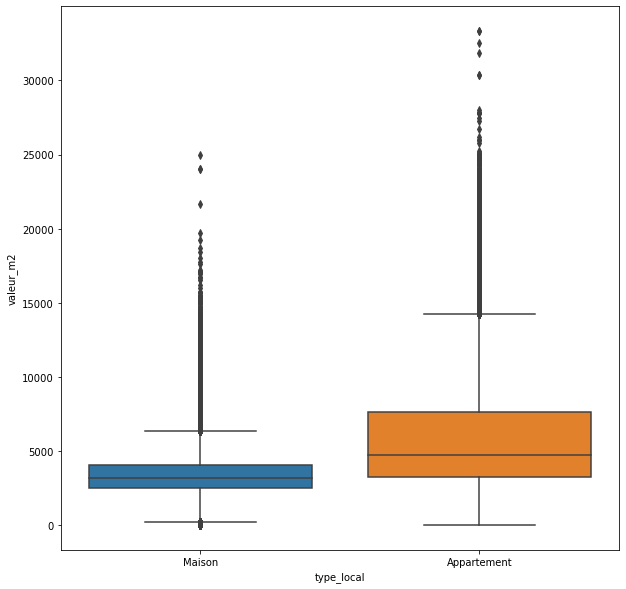

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.boxplot(x="type_local", y="valeur_m2", data=sub1)

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("valeur_m2 ~ type_local", data= sub1).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
type_local,8.469882e+11,1.0,114635.04291,0.0
Residual,6.009332e+12,813329.0,NaN,NaN


In [13]:
import scipy.stats as stats
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9350409507751465, pvalue=0.0)

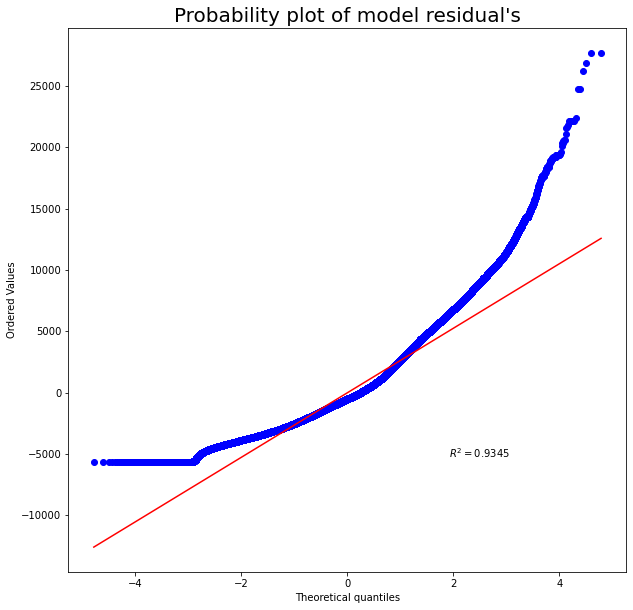

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [16]:
# Encoding Country variable before performing Kruksal Wallis Test 

df.Country_coded = sub.Country.astype('type_local').cat.codes

AttributeError: 'DataFrame' object has no attribute 'Country'

In [35]:
data_maison=data[data['type_local'] == 'Maison']

data_appart=data[data['type_local'] == 'Appartement']
data_type=[data_maison,data_appart]

In [62]:
data_type[0]

,nature_mutation,valeur_fonciere,adresse_nom_voie,nom_commune,code_departement,type_local,surface_reelle_bati,mois_mutation,valeur_m2
0,Vente,248000.0,RUE HOCHE,Combs-la-Ville,77,Maison,68.0,2017/01,3647.058824
1,Vente,213000.0,RUE LOUISE MICHEL,Combs-la-Ville,77,Maison,82.0,2017/01,2597.560976
2,Vente,200000.0,RUE DE LA THEROUANNE,Combs-la-Ville,77,Maison,107.0,2017/01,1869.158879
3,Vente,195000.0,RUE DE L'YERRES,Combs-la-Ville,77,Maison,79.0,2017/01,2468.35443
4,Vente,290300.0,AV MOLIERE,Combs-la-Ville,77,Maison,80.0,2017/01,3628.75
...,...,...,...,...,...,...,...,...,...
278837,Vente,240000.0,SQ DES LILAS,Trocy-en-Multien,77,Maison,102.0,2021/08,2352.941176
278838,Vente,140000.0,RUE DE L EGLISE,Trocy-en-Multien,77,Maison,70.0,2021/08,2000.0
278839,Vente,1500000.0,RUE PAYENNE,Paris 3e Arrondissement,75,Maison,160.0,2019/07,9375.0
278840,Vente,3120000.0,RUE PAYENNE,Paris 3e Arrondissement,75,Maison,160.0,2021/09,19500.0


In [ ]:
########################################

In [36]:


for j in range(0,2):
    sub2=pd.DataFrame(columns =data.columns)
    commune=data_type[j]['nom_commune'].unique()


    for i in commune:
        data_commune1=data_type[j][data_type[j]['nom_commune']==i]
        data_commune1.reset_index(drop=True, inplace=True)
        Q1 = np.percentile(data_commune1['valeur_m2'], 25,interpolation = 'midpoint')

        Q3 = np.percentile(data_commune1['valeur_m2'], 75, interpolation = 'midpoint')
        IQR = Q3 - Q1



        data_commune1=data_commune1[data_commune1['valeur_m2']> (Q1-1.5*IQR)]
        data_commune1=data_commune1[data_commune1['valeur_m2'] < (Q3+1.5*IQR)]



        sub2=pd.concat([sub2,data_commune1],ignore_index=True)
    
    data_type[j]=sub2
    
   

In [37]:
data_type[0].sort_values(by=['mois_mutation'],inplace=True)
data_type[1].sort_values(by=['mois_mutation'],inplace=True)

In [38]:
pd.concat([data_type[0],data_type[1]],ignore_index=True).to_csv('sub2.csv')

In [ ]:
#### no outliers

In [ ]:
#pour Dashboard

In [39]:


avg_maison=pd.DataFrame(data_type[0].groupby([ "mois_mutation",'code_departement','nom_commune'])["valeur_m2"].mean())
avg_maison_g=pd.DataFrame(data_type[0].groupby([ "mois_mutation"])["valeur_m2"].mean())

avg_maison.to_csv('avg_maison.csv')
avg_maison=pd.read_csv('avg_maison.csv')

avg_maison_g.to_csv('avg_maison.csv')
avg_maison_g=pd.read_csv('avg_maison.csv')

code=[]
nom=[]
for i in range(0,len(avg_maison_g)):
    code.append('Total')
    nom.append('Total')
    

avg_maison_g['code_departement']=code
avg_maison_g['nom_commune']=nom
avg_maison=pd.concat([avg_maison,avg_maison_g],ignore_index=True)

avg_maison.to_csv('avg_maison.csv')

In [40]:
avg_maison

,mois_mutation,code_departement,nom_commune,valeur_m2
0,2017/01,75,Paris 14e Arrondissement,15120.430472
1,2017/01,75,Paris 15e Arrondissement,11340.659341
2,2017/01,75,Paris 16e Arrondissement,14424.099010
3,2017/01,75,Paris 17e Arrondissement,10166.666667
4,2017/01,75,Paris 18e Arrondissement,15929.357798
...,...,...,...,...
52800,2021/08,Total,Total,4022.389549
52801,2021/09,Total,Total,4077.999772
52802,2021/10,Total,Total,4068.760127
52803,2021/11,Total,Total,3985.860857


In [41]:
avg_apprt=pd.DataFrame(data_type[1].groupby([ "mois_mutation",'code_departement','nom_commune'])["valeur_m2"].mean())
avg_apprt_g=pd.DataFrame(data_type[1].groupby([ "mois_mutation"])["valeur_m2"].mean())

avg_apprt.to_csv('avg_apprt.csv')
avg_apprt=pd.read_csv('avg_apprt.csv')

avg_apprt_g.to_csv('avg_apprt.csv')
avg_apprt_g=pd.read_csv('avg_apprt.csv')

code=[]
nom=[]
for i in range(0,len(avg_maison_g)):
    code.append('Total')
    nom.append('Total')
    

avg_apprt_g['code_departement']=code
avg_apprt_g['nom_commune']=nom
avg_apprt=pd.concat([avg_apprt,avg_apprt_g],ignore_index=True)

avg_apprt.to_csv('avg_apprt.csv')

In [42]:
avg_apprt

,mois_mutation,code_departement,nom_commune,valeur_m2
0,2017/01,75,Paris 10e Arrondissement,8304.486646
1,2017/01,75,Paris 11e Arrondissement,8636.752182
2,2017/01,75,Paris 12e Arrondissement,8250.908140
3,2017/01,75,Paris 13e Arrondissement,8189.330063
4,2017/01,75,Paris 14e Arrondissement,9037.134542
...,...,...,...,...
30339,2021/08,Total,Total,6211.242641
30340,2021/09,Total,Total,6734.496684
30341,2021/10,Total,Total,6797.575831
30342,2021/11,Total,Total,6949.708948


In [13]:
##############################################################################################################""#######################################################""#######################################################""#######################################################""#######################################################""#######################################################""#######################################################""#######################################################""

In [ ]:
#######################################################""#######################################################""#######################################################""

In [ ]:
#######################################################""#######################################################""#######################################################""

In [ ]:
#######################################################""#######################################################""#######################################################""

In [ ]:
##classification

In [ ]:
###################################################